   <img src="./pics/breast_Cancer.png" style="height:500px; width:500px;"/>

### Imports

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file="../data/Kursmaterialien/data/Krebs/cancer.csv"
df=pd.read_csv(file)

### Cleaning Data

In [3]:
df.dropna(inplace=True)

In [4]:
df["outcome"]=df["diagnosis"]=="M"
df.replace({False: 0, True: 1}, inplace=True)


In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,outcome
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [6]:
df.shape

(569, 33)

#### ML Models Imports

In [7]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [15]:
#### must see what data is is needed read studies what docs make their Decession ####
# features=df.drop(["outcome","id","diagnosis"],axis=1)
X=df[["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean"]]
y=df["outcome"]

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.74,test_size=0.22,shuffle=True)

model=SVC(C=1,kernel='poly',max_iter=1000,degree=5,gamma='auto')
# model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=1, degree=5, gamma='auto', kernel='poly', max_iter=1000)

In [16]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8646080760095012
0.873015873015873


### Vizualisation

<AxesSubplot:xlabel='perimeter_mean', ylabel='outcome'>

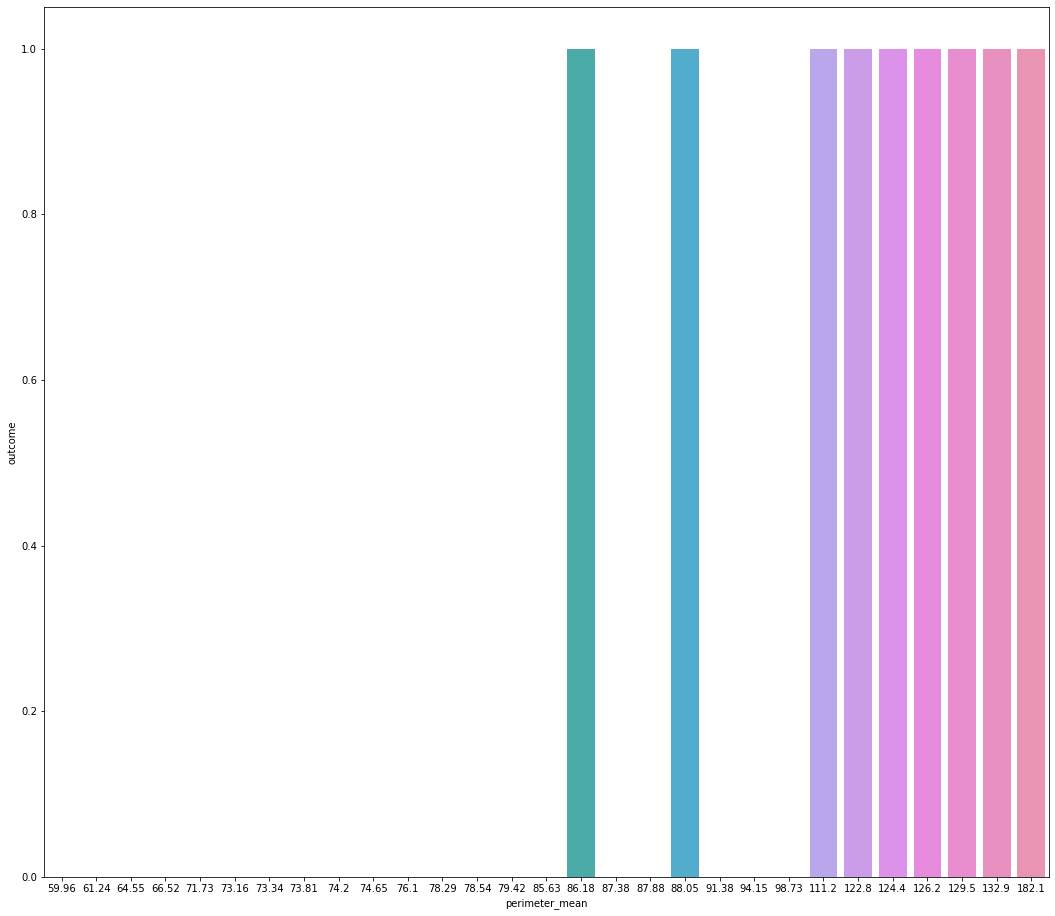

In [69]:
### Outcome depend perimeter_mean
###barplot
plt.figure(figsize=(18,16))
sns.barplot(x=X["perimeter_mean"][::20],y=y)


In [135]:
predf_test_run

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,outcome,outcome
0,17.99,10.38,122.8,1001.0,0.1184,17.99,10.38,122.8,1001.0,0.1184,1,1


In [137]:
predf_test_run=pd.DataFrame([[17.99,10.38,122.80,1001.0,0.11840]],
        columns=["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean"])

In [140]:
#Test Phase 2
predict=model.predict(predf_test_run)

In [141]:
predict_test_run=pd.DataFrame(predict,columns=["outcome"])

In [142]:
predf_test_run=pd.concat([predf_test_run,predict_test_run],axis=1)

In [143]:
predf_test_run

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,outcome
0,17.99,10.38,122.8,1001.0,0.1184,1


<IPython.core.display.Javascript object>


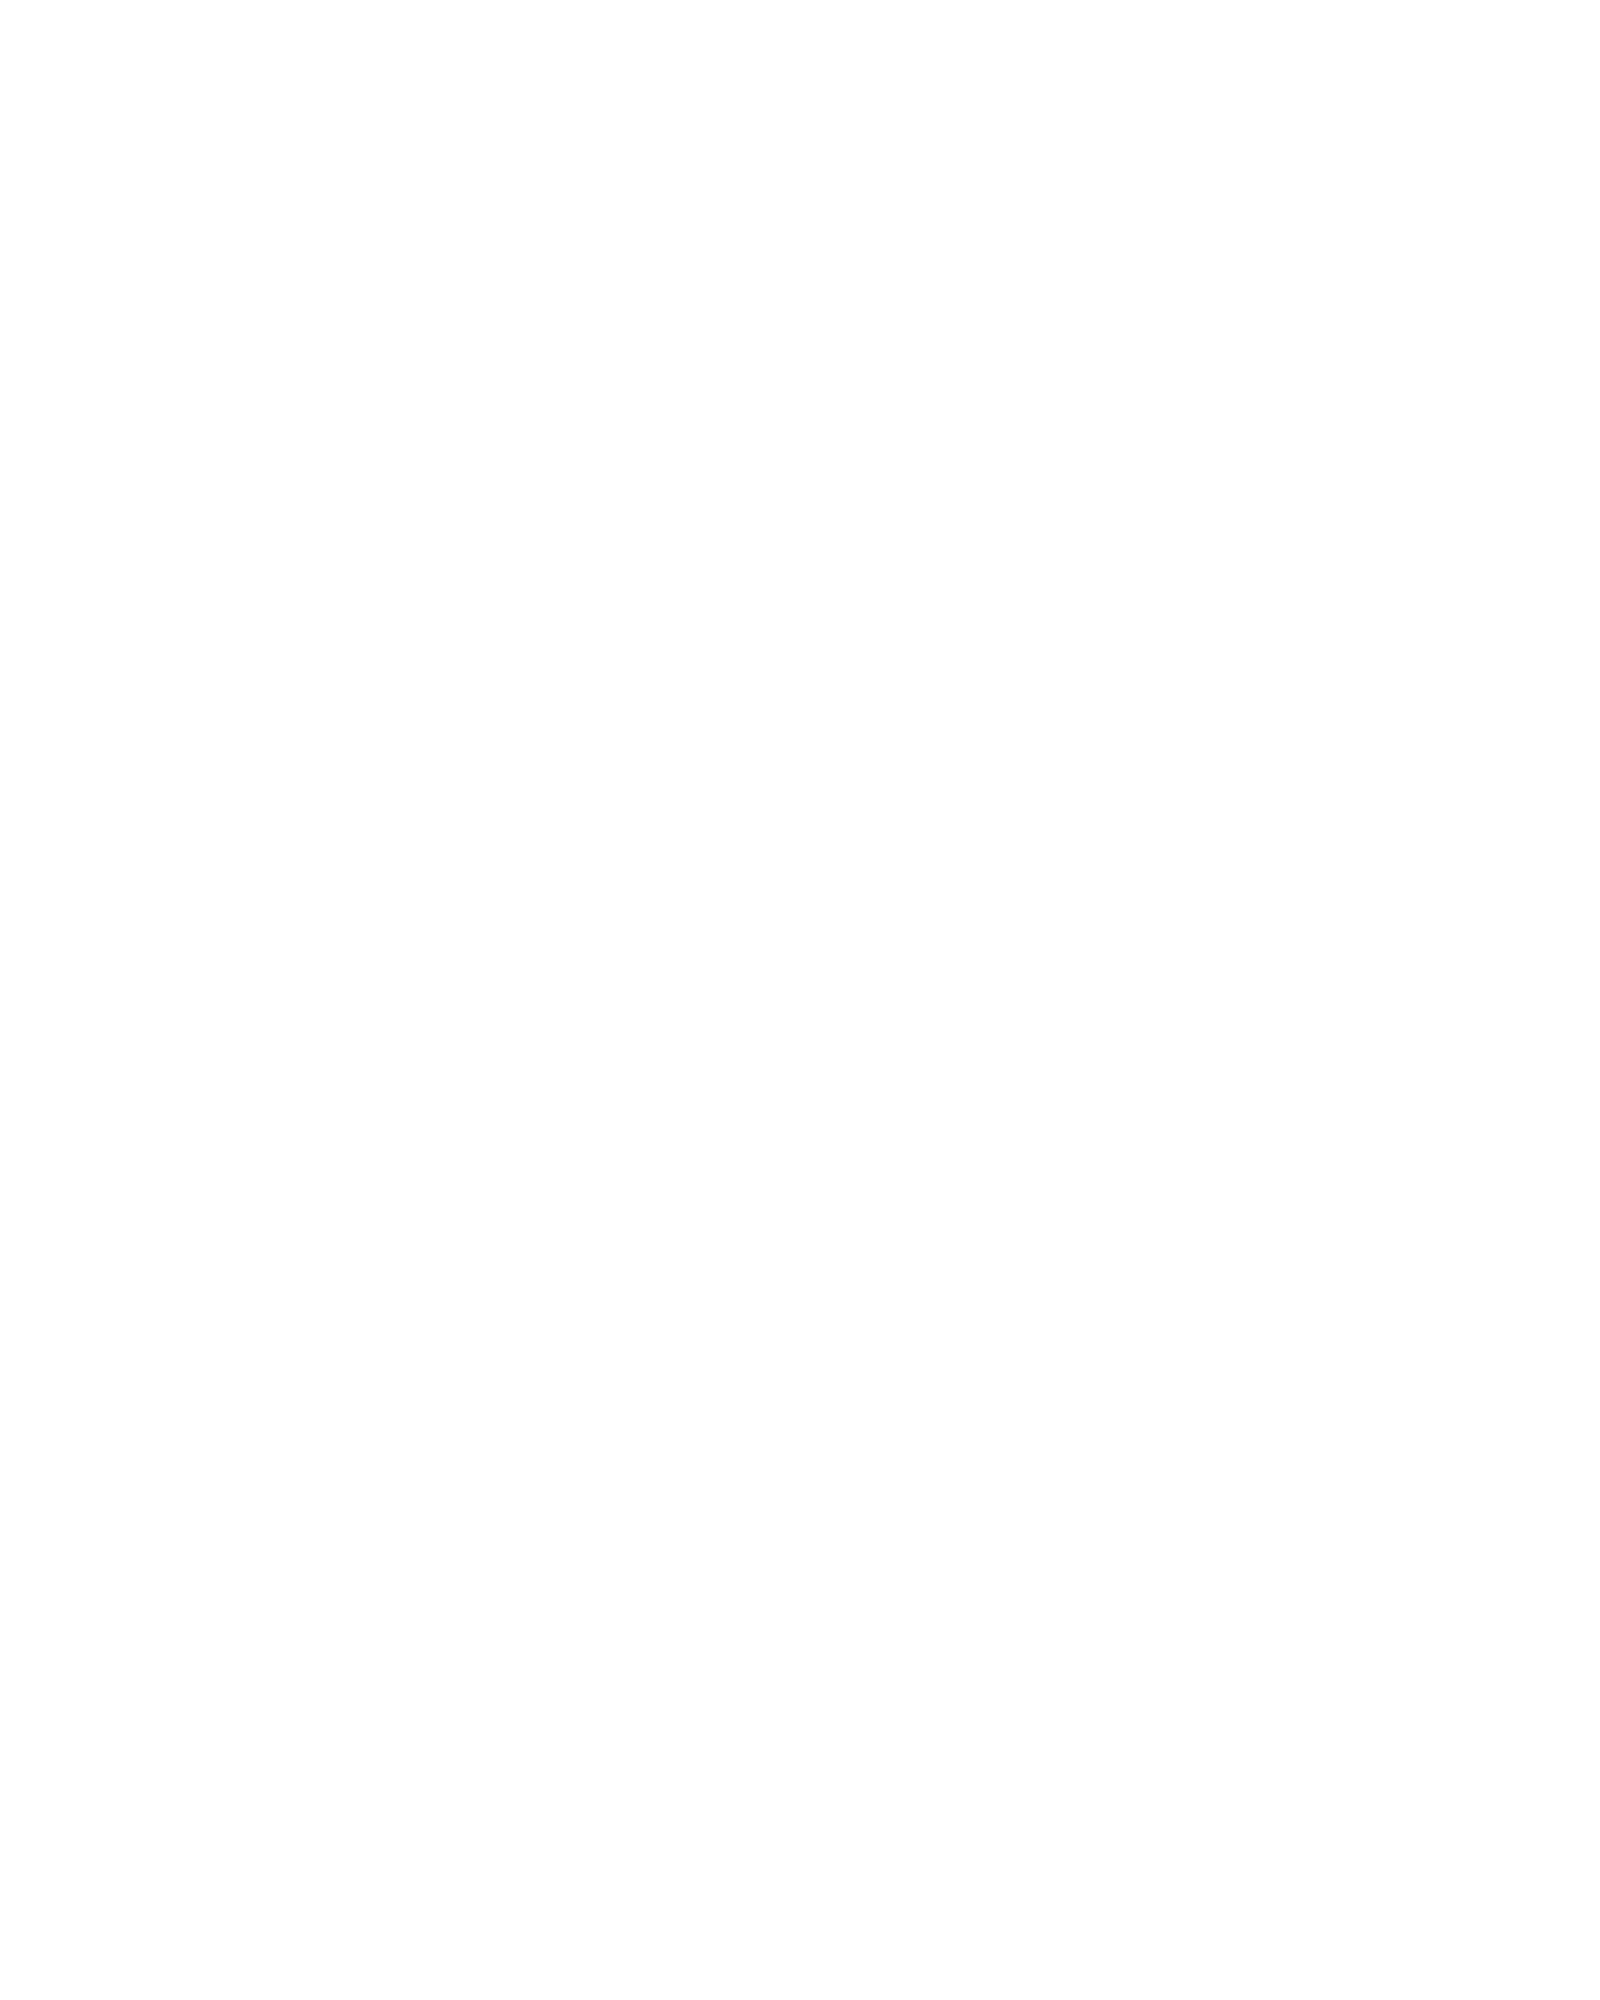

<IPython.core.display.Javascript object>


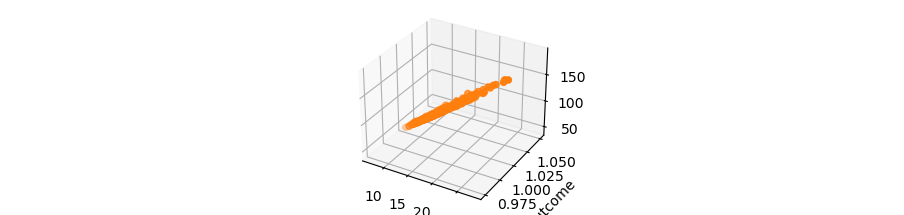

Text(0.5, 0.5, 'Outcome')

In [144]:
%matplotlib notebook
plt.style.use('_mpl-gallery')

# Make data
plt.figure(figsize=(16,20))
x=predf_test_run["radius_mean"]
y=predf_test_run["outcome"]
z=predf_test_run["perimeter_mean"]
xs=X["radius_mean"]
ys=predf_test_run["outcome"]
zs=X["perimeter_mean"]

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(x, y, z)
ax.scatter(xs,ys,zs)
plt.title("Outcome depend from Radius and Perimeter Mean")
plt.xlabel("Radius")
plt.ylabel("Outcome")






<IPython.core.display.Javascript object>


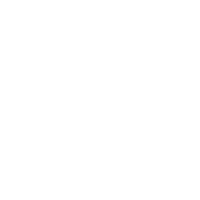

Text(0.5, 0.5, 'Outcome')

In [145]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(x, y, z)
ax.scatter(xs,ys,zs)
plt.title("Outcome depend from Radius and Perimeter Mean")
plt.xlabel("Radius")
plt.ylabel("Outcome")

In [152]:
import plotly.express as px

px.bar(predf_test_run,x="radius_mean",y="outcome")
px.bar(df,x="perimeter_mean",y="radius_mean")

In [161]:
px.bar(df,"perimeter_mean","radius_mean")

In [179]:
corr=df.describe(include="all")

In [180]:
# corr.dropna(inplace=True)

In [181]:
corr

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,outcome
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000


In [190]:
sns.regplot(x="radius_mean",y="perimeter_mean",data=df)

<Axes3DSubplot:title={'center':'Outcome depend from Radius and Perimeter Mean'}, xlabel='radius_mean', ylabel='perimeter_mean'>

In [191]:
def inputs():
    
    global radius,texture,perimeter,area,smoothness,result,inputs

#     i=0
#     while i <3:
#         i+=1
    radius=float(input("Radius Mean: "))
    texture=float(input("Texture Mean: "))
    perimeter=float(input("Perimeter Mean: "))
    area=float(input("area Mean: "))
    smoothness=float(input("Smoothness Mean:"))

    inputs=pd.DataFrame([[radius,texture,perimeter,area,smoothness]]
                            ,columns=["radius_mean","perimeter_mean","texture_mean","area_mean","smoothness_mean"])


    result=[]
    result.append(model.predict(inputs))
    result=pd.DataFrame(result,columns=["Outcome"])
    return radius,texture,perimeter,area,smoothness,result


    


In [192]:
inputs()



Radius Mean: 20
Texture Mean: 34
Perimeter Mean: 50
area Mean: 120
Smoothness Mean:0.555


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.




(20.0,
 34.0,
 50.0,
 120.0,
 0.555,
    Outcome
 0        0)

In [193]:
pd.concat([inputs,result],axis=1)

,radius_mean,perimeter_mean,texture_mean,area_mean,smoothness_mean,Outcome
0,20.0,34.0,50.0,120.0,0.555,0


### Tensorflow 2 still on Contruction

In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten


In [199]:
model_tf=Sequential()
model_tf.add(Dense(64,activation="relu",input_shape=(5,)))
model_tf.add(Dense(32,activation="relu"))
model_tf.add(Flatten())
model_tf.add(Dense(16,activation="relu"))
model_tf.add(Dense(10,activation="softmax"))
model_tf.add(Dense(5))

model_tf.compile(optimizer='sgd',loss="mse",metrics=["accuracy"])

history=model_tf.fit(X_train,y_train,batch_size=128,epochs=20,shuffle=True)
model_tf.summary()

Epoch 1/20
2/2 [==============================] - 1s 0s/step - loss: 0.4319 - accuracy: 0.3938
Epoch 2/20
2/2 [==============================] - 0s 16ms/step - loss: 0.4256 - accuracy: 0.3938
Epoch 3/20
2/2 [==============================] - 0s 13ms/step - loss: 0.4196 - accuracy: 0.3938
Epoch 4/20
2/2 [==============================] - 0s 0s/step - loss: 0.4139 - accuracy: 0.3938
Epoch 5/20
2/2 [==============================] - 0s 0s/step - loss: 0.4085 - accuracy: 0.3938
Epoch 6/20
2/2 [==============================] - 0s 0s/step - loss: 0.4032 - accuracy: 0.3938
Epoch 7/20
2/2 [==============================] - 0s 0s/step - loss: 0.3980 - accuracy: 0.3938
Epoch 8/20
2/2 [==============================] - 0s 10ms/step - loss: 0.3930 - accuracy: 0.3938
Epoch 9/20
2/2 [==============================] - 0s 0s/step - loss: 0.3882 - accuracy: 0.3938
Epoch 10/20
2/2 [==============================] - 0s 0s/step - loss: 0.3835 - accuracy: 0.3938
Epoch 11/20
2/2 [==========================

In [200]:
model_tf.evaluate(X_test,y_test)

3/3 [==============================] - 0s 8ms/step - loss: 0.2946 - accuracy: 0.3333


[0.2946122884750366, 0.3333333432674408]

In [201]:
model_tf.predict(X_train[:10])

1/1 [==============================] - 0s 99ms/step


array([[-0.08105145,  0.30757642, -0.05120681,  0.2517453 ,  0.14603439],
       [-0.08105145,  0.30757642, -0.05120681,  0.2517453 ,  0.14603439],
       [-0.08105145,  0.30757642, -0.05120681,  0.2517453 ,  0.14603439],
       [-0.08105145,  0.30757642, -0.05120681,  0.2517453 ,  0.14603439],
       [-0.08105145,  0.30757642, -0.05120681,  0.2517453 ,  0.14603439],
       [-0.08105145,  0.30757642, -0.05120681,  0.2517453 ,  0.14603439],
       [-0.08105145,  0.30757642, -0.05120681,  0.2517453 ,  0.14603439],
       [-0.08105145,  0.30757642, -0.05120681,  0.2517453 ,  0.14603439],
       [-0.08105145,  0.30757642, -0.05120681,  0.2517453 ,  0.14603439],
       [-0.08105145,  0.30757642, -0.05120681,  0.2517453 ,  0.14603439]],
      dtype=float32)

In [203]:
import matplotlib.pyplot as plt
print(history.keys())
plt.plot(history["loss"])
plt.plot(history["accuracy"])

AttributeError: 'History' object has no attribute 'keys'

#### Video Capture or IMG capture for messure the Cancer